---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Merging Dataframes


In [1]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item Purchased,Name
Store 1,22.5,Sponge,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Spoon,Filip


In [ ]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

In [ ]:
df['Delivered'] = True
df

In [ ]:
df['Feedback'] = ['Positive', None, 'Negative']
df

In [ ]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

In [ ]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

In [ ]:
#outer join (full)
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

In [ ]:
#inner join
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

In [ ]:
#left join both on index
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

In [ ]:
#right join
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

In [ ]:
#left join both on specified column
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

In [ ]:
#suffixes overlapping column names : default left _x, right_y
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

In [ ]:
#join on multiple condition 
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

# Idiomatic Pandas: Making Code Pandorable

In [4]:
import pandas as pd
df = pd.read_csv('census.csv')


KeyError: '[False  True  True ...  True  True  True] not found in axis'

In [2]:
#chain method 
(df.where(df['SUMLEV']==50) #wrap in () to span over lines
    .dropna() #df.drop(df['SUMLEV']==50)
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [27]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County          50       3         6      1       1   
          Baldwin County          50       3         6      1       3   
          Barbour County          50       3         6      1       5   
          Bibb County             50       3         6      1       7   
          Blount County           50       3         6      1       9   
          Bullock County          50       3         6      1      11   
          Butler County           50       3         6      1      13   
          Calhoun County          50       3         6      1      15   
          Chambers County         50       3         6      1      17   
          Cherokee County         50       3         6      1      19   
          Chilton County          50       3         6      1      21   
          Choctaw County          50       3         6      1      23   
          Clarke County           50       3         6      1      25   
          Clay County             50       3         6      1      27   
          Cleburne County         50       3         6      1      29   
          Coffee County           50       3         6      1      31   
          Colbert County          50       3         6      1      33   
          Conecuh County          50       3         6      1      35   
          Coosa County            50       3         6      1      37   
          Covington County        50       3         6      1      39   
          Crenshaw County         50       3         6      1      41   
          Cullman County          50       3         6      1      43   
          Dale County             50       3         6      1      45   
          Dallas County           50       3         6      1      47   
          DeKalb County           50       3         6      1      49   
          Elmore County           50       3         6      1      51   
          Escambia County         50       3         6      1      53   
          Etowah County           50       3         6      1      55   
          Fayette County          50       3         6      1      57   
          Franklin County         50       3         6      1      59   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County         50       2         3     55     129   
          Washington County       50       2         3     55     131   
          Waukesha County         50       2         3     55     133   
          Waupaca County          50       2         3     55     135   
          Waushara County         50       2         3     55     137   
          Winnebago County        50       2         3     55     139   
          Wood County             50       2         3     55     141   
Wyoming   Albany County           50       4         8     56       1   
          Big Horn County         50       4         8     56       3   
          Campbell County         50       4         8     56       5   
          Carbon County           50       4         8     56       7   
          Converse County         50       4         8     56       9   
          Crook County            50       4         8     56      11   
          Fremont County          50       4         8     56      13   
          Goshen County           50       4         8     56      15   
          Hot Springs County      50       4         8     56      17   
          Johnson County          50       4         8     56      19   
          Laramie County          50       4         8     56      21   
          Lincoln County          50       4         8     56      23   
          Natrona County          50       4         8     56      25   
          Niobrara County         50       4         8     56      27   
          Park County             50       4         8     56      29   
          Platt

In [33]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})


#break down
data = df[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
dic= {}

dic['min'] = data.min #reduce to Series
dic['max'] = data.max 
#or
dic['min'] = np.min(data)# {min : Series, 
dic['max'] = np.max(data) # max : Series}
#print(dic)
type(dic['min']) #every pair is a Series
pd.Series(dic) #every key will be row index
pd.DataFrame(dic)#every key will be column name. if value is Seies, along axis 0

,min,max
POPESTIMATE2010,83,9826009
POPESTIMATE2011,90,9896602
POPESTIMATE2012,81,9970436
POPESTIMATE2013,89,10045175
POPESTIMATE2014,87,10109436
POPESTIMATE2015,89,10170292


In [30]:
#apply() map the function to for every 0or1 axis of DF and return a DF
df.apply(min_max, axis=1) 

#    a copy of df generated
#1. for every row in df, 
#2. select columns of intrest, assign to data (reduced to Series)
#3. {'min': np.min(), 'max': np:max()}, a dict
#4. return pd.Series(the dict) 
#  --> min  x
#      max  y  to overwrite the row        min  max
#5. every Series is a row of DataFrame: n   x   y 
#6. continue to next row

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [69]:
#define min_max() for later apply()
import numpy as np
def min_max(row): #input will be each iteratable (row or column) for DF
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data) #new column 'max' =
    row['min'] = np.min(data) #new column 'min' =
    return row

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County    50.0     3.0       6.0    1.0     1.0   
        Baldwin County    50.0     3.0       6.0    1.0     3.0   
        Barbour County    50.0     3.0       6.0    1.0     5.0   
        Bibb County       50.0     3.0       6.0    1.0     7.0   
        Blount County     50.0     3.0       6.0    1.0     9.0   

                        CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                             
Alabama Autauga County        54571.0            54571.0          54660.0   
        Baldwin County       182265.0           182265.0         183193.0   
        Barbour County        27457.0            27457.0          27341.0   
        Bibb County           22915.0            22919.0          22861.0   
        Blount County         57322.0            57322.0          57373.0   

                        POPESTIMATE2011  POPESTIMATE2012    ...     \
STNAME  CTYNAME                                             ...      
Alabama Autauga County          55253.0          55175.0    ...      
        Baldwin County         186659.0         190396.0    ...      
        Barbour County          27226.0          27159.0    ...      
        Bibb County             22733.0          22642.0    ...      
        Blount County           57711.0          57776.0    ...      

                        RDOMESTICMIG2013  RDOMESTICMIG2014  RDOMESTICMIG2015  \
STNAME  CTYNAME                                                                
Alabama Autauga County         -3.012349          2.265971         -2.530799   
        Baldwin County         21.845705         19.243287         17.197872   
        Barbour County         -7.056824         -3.904217        -10.543299   
        Bibb County            -6.201001         -0.177537          0.177258   
        Blount County          -1.748766         -2.062535         -1.369970   

                        RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  \
STNAME  CTYNAME                                                              
Alabama Autauga County     7.606016    -2.626146    -2.722002     2.592270   
        Baldwin County    15.844176    18.559627    22.727626    20.317142   
        Barbour County    -4.874741    -2.758113    -7.167664    -3.978583   
        Bibb County       -5.088389    -4.363636    -5.403729     0.754533   
        Blount County      1.859511    -0.848580    -1.402476    -1.577232   

                        RNETMIG2015       max       min  
STNAME  CTYNAME                                          
Alabama Autauga County    -2.187333   55347.0   54660.0  
        Baldwin County    18.293499  203709.0  183193.0  
        Barbour County   -10.543299   27341.0   26489.0  
        Bibb County        1.107861   22861.0   22512.0  
        Blount County     -0.884411   57776.0   57373.0  

[5 rows x 100 columns]

In [80]:
#Single code for min_max()

coln = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015'] #define range to compair

(df.head().apply(lambda row #.head() to test run
                : row.append(pd.Series( #append Series to Series
                    {'Max':row.loc[coln].max(), #from one dict, 2 keys(column name): 2 values
                     'Min':row.loc[coln].min()})), axis=1))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County    50.0     3.0       6.0    1.0     1.0   
        Baldwin County    50.0     3.0       6.0    1.0     3.0   
        Barbour County    50.0     3.0       6.0    1.0     5.0   
        Bibb County       50.0     3.0       6.0    1.0     7.0   
        Blount County     50.0     3.0       6.0    1.0     9.0   

                        CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                             
Alabama Autauga County        54571.0            54571.0          54660.0   
        Baldwin County       182265.0           182265.0         183193.0   
        Barbour County        27457.0            27457.0          27341.0   
        Bibb County           22915.0            22919.0          22861.0   
        Blount County         57322.0            57322.0          57373.0   

                        POPESTIMATE2011  POPESTIMATE2012    ...     \
STNAME  CTYNAME                                             ...      
Alabama Autauga County          55253.0          55175.0    ...      
        Baldwin County         186659.0         190396.0    ...      
        Barbour County          27226.0          27159.0    ...      
        Bibb County             22733.0          22642.0    ...      
        Blount County           57711.0          57776.0    ...      

                        RDOMESTICMIG2013  RDOMESTICMIG2014  RDOMESTICMIG2015  \
STNAME  CTYNAME                                                                
Alabama Autauga County         -3.012349          2.265971         -2.530799   
        Baldwin County         21.845705         19.243287         17.197872   
        Barbour County         -7.056824         -3.904217        -10.543299   
        Bibb County            -6.201001         -0.177537          0.177258   
        Blount County          -1.748766         -2.062535         -1.369970   

                        RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  \
STNAME  CTYNAME                                                              
Alabama Autauga County     7.606016    -2.626146    -2.722002     2.592270   
        Baldwin County    15.844176    18.559627    22.727626    20.317142   
        Barbour County    -4.874741    -2.758113    -7.167664    -3.978583   
        Bibb County       -5.088389    -4.363636    -5.403729     0.754533   
        Blount County      1.859511    -0.848580    -1.402476    -1.577232   

                        RNETMIG2015       Max       Min  
STNAME  CTYNAME                                          
Alabama Autauga County    -2.187333   55347.0   54660.0  
        Baldwin County    18.293499  203709.0  183193.0  
        Barbour County   -10.543299   27341.0   26489.0  
        Bibb County        1.107861   22861.0   22512.0  
        Blount County     -0.884411   57776.0   57373.0  

[5 rows x 100 columns]

In [82]:
#This code overwrite each row to a single value --> Reduce to Series
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.head().apply(lambda x: np.max(x[rows]), axis=1)

STNAME   CTYNAME       
Alabama  Autauga County     55347.0
         Baldwin County    203709.0
         Barbour County     27341.0
         Bibb County        22861.0
         Blount County      57776.0
dtype: float64

# Group by

This function takes some column name or names and splits the dataframe up into chunks based on those names, it returns a dataframe group by object. Which can be iterated upon, and then returns a tuple where the first item is the group condition, and the second item is the data frame reduced by that grouping.

In [53]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901
10,50,3,6,1,19,Alabama,Cherokee County,25989,25986,25976,...,6.339327,1.113180,5.488706,-0.076806,-3.239866,6.416167,1.420264,5.757384,0.230419,-2.931307


In [22]:
%%timeit -n 10

#Traditional way to calculate average: slowed by masking
state_pop = pd.DataFrame()#df, series, or dict are all slow
for state in df['STNAME'].unique(): #a set-like list
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])#Series don't have average. So use numpy.average()
    state_pop = state_pop.append(pd.Series(data={'Population': avg}, name = state)) #append every series to dataframe
    #print('Counties in state ' + state + ' have an average population of ' + str(avg))
state_pop.head() 

1.24 s ± 78.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
%%timeit -n 10
state_pop = pd.Series()
for state in df['STNAME'].unique(): #a set-like list
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])#Series don't have average. So use numpy.average()
    state_pop = state_pop.append(pd.Series({state: avg})) #append every Dict to Series
    #print('Counties in state ' + state + ' have an average population of ' + str(avg))
state_pop.head() 

1.3 s ± 35.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
%%timeit -n 10
state_pop = pd.Series()
for state in df['STNAME'].unique(): #a set-like list
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])#Series don't have average. So use numpy.average()
    state_pop.loc[state] = avg #append every Dict to Series
    #print('Counties in state ' + state + ' have an average population of ' + str(avg))
state_pop.head() 

1.36 s ± 78.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
%%timeit -n 10
state_pop = dict()
for state in df['STNAME'].unique(): #a set-like list
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])#Series don't have average. So use numpy.average()
    state_pop[state] = avg #append every Dict to Series
    #print('Counties in state ' + state + ' have an average population of ' + str(avg))
state_pop = pd.Series(state_pop)
state_pop 

1.26 s ± 65.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [45]:
#%%timeit -n 10
state_pop = pd.DataFrame()
for group, frame in df.groupby('STNAME'): #Unpacking
    avg = np.average(frame['CENSUS2010POP']) #frame is the segment of the group, still WITH the group column,
    state_pop = state_pop.append(pd.Series(data={'Population2010': avg}, name=group))
    #print('Counties in state ' + group + ' have an average population of ' + str(avg))
state_pop.head()

84.7 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Then we can tell group by to use this function to split up our data frame. But you need to set the index of the data frame to be the column that you want to group by first.

In [72]:
df.groupby('STNAME').get_group('Alabama')

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901
10,50,3,6,1,19,Alabama,Cherokee County,25989,25986,25976,...,6.339327,1.113180,5.488706,-0.076806,-3.239866,6.416167,1.420264,5.757384,0.230419,-2.931307


In [46]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [68]:
#Groupby the index with Function

df_gf = df.set_index('STNAME') # set as index first, or just set the for statement

def fun(item): #a little mess, but same as if-elif-else
    if item[0]<'M':
        return 0    # return = break
    if item[0]<'Q': # between M and Q
        return 1
    return 2      # > Q
#the function return will become the "group"
for group, frame in df.set_index('STNAME').groupby(fun): #groupby(callable)
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')
    

,SUMLEV,REGION,DIVISION,STATE,COUNTY,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
STNAME,,,,,,,,,,,,,,,,,,,,,
Maine,50,1,1,23,1,Androscoggin County,107702,107702,107706,107403,...,-6.480436,-2.344611,-5.611312,-2.812272,-5.143472,-5.485591,-1.339778,-4.448105,-1.471321,-3.811015
Maine,50,1,1,23,3,Aroostook County,71870,71871,71721,71335,...,-2.292808,-5.490483,-7.917555,-6.157954,-7.594808,-2.166984,-5.462327,-7.818053,-5.985703,-7.406387
Maine,50,1,1,23,5,Cumberland County,281674,281673,281462,282758,...,1.456879,1.753516,2.396554,2.955955,2.474682,3.782213,3.905719,4.659772,5.528473,5.042814
Maine,50,1,1,23,7,Franklin County,30768,30768,30719,30716,...,1.692846,-2.705786,-4.910144,-8.010549,-6.279383,2.604379,-1.988590,-4.124521,-7.021592,-5.282655
Maine,50,1,1,23,9,Hancock County,54418,54420,54370,54546,...,3.874546,0.348323,4.206753,0.255619,-0.054846,5.178303,1.906613,5.669971,1.862367,1.553973
Maine,50,1,1,23,11,Kennebec County,122151,122151,122104,121785,...,-1.771298,-1.552731,-3.954344,1.495003,-2.879596,-1.566286,-1.183033,-3.583624,1.957545,-2.423176
Maine,50,1,1,23,13,Knox County,39736,39736,39715,39692,...,1.662322,-1.512726,1.261511,4.204802,1.456317,2.040122,-0.479030,2.169799,5.186761,2.435564
Maine,50,1,1,23,15,Lincoln County,34457,34457,34388,34278,...,-1.310692,1.372443,1.901029,2.956674,-3.376494,-0.407771,2.306872,2.866168,4.010539,-2.319504
Maine,50,1,1,23,17,Oxford County,57833,57831,57773,57775,...,1.696265,-3.053541,-2.717131,2.006508,0.279469,1.921279,-2.966793,-2.612626,2.215883,0.489070


In [77]:
#Get_group( ) to retrieve desired part of DataFrame

df.set_index('STNAME').groupby(fun).get_group(2) #group name, one at a time

,SUMLEV,REGION,DIVISION,STATE,COUNTY,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
STNAME,,,,,,,,,,,,,,,,,,,,,
Rhode Island,50,1,1,44,1,Bristol County,49875,49875,49864,49273,...,-10.551056,0.487329,2.213715,-0.854518,2.832948,-10.167748,1.076186,2.863613,-0.061037,3.627804
Rhode Island,50,1,1,44,3,Kent County,166158,166158,166038,165308,...,-3.844923,-3.222534,-0.491322,1.346217,-2.019663,-2.855022,-2.192777,0.467059,2.437745,-0.927953
Rhode Island,50,1,1,44,5,Newport County,82888,83141,83142,83005,...,-4.333512,-6.231806,-7.761075,-3.976456,-3.833300,-2.371394,-1.458508,-4.303649,-0.484934,0.424574
Rhode Island,50,1,1,44,7,Providence County,626667,626663,627090,627784,...,-6.944123,-6.008037,-7.356545,-5.217773,-6.711982,-1.367468,-0.816240,-1.802997,1.169719,-0.347689
Rhode Island,50,1,1,44,9,Washington County,126979,127094,127085,126486,...,-4.669304,-2.659574,1.551904,1.400112,0.506035,-3.533527,-1.788880,2.462459,2.428442,1.533918
South Carolina,50,3,5,45,1,Abbeville County,25417,25416,25338,25105,...,-6.779930,-4.027434,-3.838158,-1.643320,-0.481367,-6.264497,-3.349549,-3.078522,-0.761538,0.401139
South Carolina,50,3,5,45,3,Aiken County,160099,160106,160551,161816,...,4.193978,5.930665,3.390804,1.411969,5.260832,4.944675,6.465902,3.916226,2.160557,6.084161
South Carolina,50,3,5,45,5,Allendale County,10419,10419,10344,10251,...,-11.750425,-24.696236,-14.334023,-10.558147,-26.142424,-11.556203,-24.301097,-13.930248,-10.148122,-25.724145
South Carolina,50,3,5,45,7,Anderson County,187126,187123,187262,188531,...,4.188476,2.249433,3.999832,8.599515,5.991825,5.252892,3.196841,4.968212,9.746812,7.127227


**split-apply-combine:** A common work flow with group by that you split your data, you apply some function, then you combine the results. 

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [94]:
#.agg() to apply specific {columns/row : function, :, :} of each group
#Used after groupby
#agg returns a df easily
df.groupby('STNAME').agg({'CENSUS2010POP': np.average}).head()

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207


In [98]:
#apply can do similr job as agg

#apply will reduce the df to Series by default
df.groupby('STNAME').apply(\
lambda grp, p2010: np.average(grp[p2010]), 'CENSUS2010POP').head()

STNAME
Alabama        71339.343284
Alaska         24490.724138
Arizona       426134.466667
Arkansas       38878.906667
California    642309.586207
dtype: float64

In [4]:
#the type of grouped object, Series or DF, will affect the .agg()
#level=0 indicate simply group by index
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))#DataFrame
print(type(df.groupby(level=0)['POPESTIMATE2010'])) #Series

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>
<class 'pandas.core.groupby.groupby.SeriesGroupBy'>


In [15]:
#for Series.agg(), only one column of data
#agg() create new columns with results of the functions on the Series 

(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum})).head()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


,avg,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956


In [17]:
#for DF.agg(), multiple columns of data
#agg() apply each function to every column, and add label on top
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum})).head()

avg                             sum                
           POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010 POPESTIMATE2011
STNAME                                                                    
Alabama       71420.313433    71658.328358         4785161         4801108
Alaska        24621.413793    24921.379310          714021          722720
Arizona      427213.866667   431248.800000         6408208         6468732
Arkansas      38965.253333    39180.506667         2922394         2938538
California   643691.017241   650000.586207        37334079        37700034

In [41]:
#for DF.agg(), multiple columns of data
##agg() apply the function to the original column
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum})).head()

,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034


In [43]:
#group by will set group as index, 
#Not matter whether you set index before
#Not matter use level=0 or index name 
#reset_index is good to save orginal index
(df.reset_index().groupby('STNAME')['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum})).head()

,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034


In [ ]:
# A cleaner solution will be apply()
eg = pd.DataFrame({"User": ["user1", "user2", "user2", "user3", "user2", "user1", "user3"],
                   "Amount": [10.0, 5.0, 8.0, 10.5, 7.5, 8.0, 9],
                   'Score': [9, 1, 8, 7, 7, 6, 9]}, 
                    index=np.arange(100,107))
eg

In [23]:
# A cleaner solution will be apply()

def my_agg(x): #x will be each group for apply()
    names = {
        'Amount mean': x['Amount'].mean(),
        'Amount std':  x['Amount'].std(),
        'Amount range': x['Amount'].max() - x['Amount'].min(),
        'Score Max':  x['Score'].max(),
        'Score Sum': x['Score'].sum(),
        'Amount Score Sum': (x['Amount'] * x['Score']).sum()}
    #return a Series, with re-orderred index (will be a row for the group)
    return pd.Series(names, index=['Amount range', 'Amount std', 'Amount mean',
                                   'Score Sum', 'Score Max', 'Amount Score Sum'])

eg.groupby('User').apply(my_agg)

,Amount range,Amount std,Amount mean,Score Sum,Score Max,Amount Score Sum
User,,,,,,
user1,2.0,1.414214,9.000000,15.0,9.0,138.0
user2,3.0,1.607275,6.833333,16.0,8.0,121.5
user3,1.5,1.060660,9.750000,16.0,9.0,154.5


In [38]:
(eg.set_index('User').groupby('User')
 .apply(lambda x: pd.Series(
     {'Mean Amount': x['Amount'].mean(),
      'Score Sum': x['Score'].sum(),
      'Score Max': x['Score'].max()},
       index=['Score Max', 'Score Sum', 'Mean Amount'],
       name = 'Example')))






Example,Score Max,Score Sum,Mean Amount
User,,,
user1,9.0,15.0,9.000000
user2,8.0,16.0,6.833333
user3,9.0,16.0,9.750000


# Scales

Ratio : absolute, e.g. weight, hight<br>Interval: ralative, no true 0, e.g. temp, direction<br>Oridinal: in-order, not numerical. e.g. ranks<br>Nominal/Categorical: Symbolic only e.g. True, False

In [46]:
#Convert between datatype/scales
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'],
                  columns = ['Grades']) #save the following code

#df.rename(columns={0: 'Grades'}, inplace=True)
df.head()

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B


In [47]:
#Convert data to category
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [51]:
#Extract the data, convert to category 
#and specify [low-->high], becomes nominal
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True) #Nomical
grades.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """


excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [52]:
#Comparison and masking now enabled
#>,<,=, min, max...
grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

In [56]:
#Example
s = pd.Series(['Low', 'Low', 'High', 'Medium', 'Low', 'High', 'Low'])

s.astype('category', 
         categories=['Low', 'Medium', 'High'], 
         ordered=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


0       Low
1       Low
2      High
3    Medium
4       Low
5      High
6       Low
dtype: category
Categories (3, object): [Low < Medium < High]

In [69]:
#Reduce Ratio/interval to Category data
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df = (df.set_index('STNAME')
 .groupby(level=0)['CENSUS2010POP']
 .agg({'avg': np.average}))
                                                                    #agg({'avg': np.average})
df.head()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,avg
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207


In [71]:
#cut(x, bins) 
#reduce data into one of 10 intervals
pd.cut(df['avg'],10)


,avg
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207


In [72]:
#more Example on pd.cut():

s = pd.Series([168, 180, 174, 190, 170, 185, 179, 181, 175, 169, 182, 177, 180, 171])

# cut and label in order [low --> high].
pd.cut(s, 3, labels=['Small', 'Medium', 'Large'])

0      Small
1     Medium
2      Small
3      Large
4      Small
5      Large
6     Medium
7     Medium
8      Small
9      Small
10    Medium
11    Medium
12    Medium
13     Small
dtype: category
Categories (3, object): [Small < Medium < Large]

# Pivot Tables

In [74]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('cars.csv')
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [75]:
#Use .pivot_table() to expore relationships

#Here, we wonna know, for every maker, 
#Does miles of battery increase with Year?

#1.extract set(years), set(makes)
#2. for each year: 2012BMW.avg, 2012FORD.avg ...
#2b. or start with columns: BMW2012.avg, BMW2013.avg...
df.pivot_table(values='(kW)', index='YEAR', columns='Make', 
               aggfunc=np.mean)


Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [90]:
#Pass multiple functions to aggfunc, retunes hierachy 
df.pivot_table(values='(kW)', index='YEAR', columns='Make', 
               aggfunc=[np.mean,np.min], margins=True)#give cummulative 

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

          
Make All  
YEAR      
2012  49  
2013  35  
2014  35  
2015  35  
2016  35  
All   35

In [91]:
#We can use pivot_table to group data
#Multi-level index:
df.pivot_table(index=['Make', 'Model']).head() #Avg by default

,,(g/km),(kW),(km),CITY (Le/100 km),CITY (kWh/100 km),COMB (Le/100 km),COMB (kWh/100 km),HWY (Le/100 km),HWY (kWh/100 km),RATING,TIME (h),YEAR
Make,Model,,,,,,,,,,,,
BMW,i3,0,125.0,130,1.7,15.2,1.9,16.8,2.1,18.8,10.0,4,2015.5
CHEVROLET,SPARK EV,0,104.0,131,1.8,16.0,2.0,17.8,2.2,19.6,10.0,7,2015.0
FORD,FOCUS ELECTRIC,0,107.0,122,2.1,19.0,2.2,20.0,2.4,21.1,10.0,4,2014.5
KIA,SOUL EV,0,81.0,149,2.0,17.5,2.2,19.9,2.6,22.7,10.0,4,2015.5
MITSUBISHI,i-MiEV,0,49.0,100,1.9,16.9,2.1,18.7,2.4,21.4,10.0,7,2014.0


# Date Functionality in Pandas

In [2]:
import pandas as pd
import numpy as np

### Timestamp

In [102]:
#Pandas default: M, D, Y
#can be inteligent
print(pd.Timestamp('9/1/2016 10:05AM'),
      pd.Timestamp('Sep/1/2016 10:05AM'),
      pd.Timestamp('13/1/2016 13'))

2016-09-01 10:05:00 2016-09-01 10:05:00 2016-01-13 13:00:00


### Period

In [4]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [5]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [105]:
#pd.Timestamp as index: DatetimeIndex

t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
print(t1,t1.index)

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object DatetimeIndex(['2016-09-01', '2016-09-02', '2016-09-03'], dtype='datetime64[ns]', freq=None)


pandas.tseries.index.DatetimeIndex

### PeriodIndex

In [8]:
#Convert index to Periodindex

#can than groupby
pd.PeriodIndex(['2010-09-01']*3, freq='Q')

PeriodIndex(['2010Q3', '2010Q3', '2010Q3'], dtype='period[Q-DEC]', freq='Q-DEC')

In [107]:
#Period as index: PeriodIndex
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2, type(t2.index)

(2016-09    d
 2016-10    e
 2016-11    f
 Freq: M, dtype: object, pandas.core.indexes.period.PeriodIndex)

### Converting to Datetime

In [10]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,16,46
"Aug 29, 2014",14,66
2015-06-26,59,99
7/12/16,27,17


In [11]:
#.to_datetime() convert to Datetime
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,16,46
2014-08-29,14,66
2015-06-26,59,99
2016-07-12,27,17


In [12]:
#Can specify order other than default
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [13]:
#Datetime - Datetime = Timedeltas
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [108]:
#Can do a lot math..
pd.Timestamp('9/2/2016 8:10AM')
+ pd.Timedelta('12D 3H')

Timedelta('12 days 03:00:00')

### Working with Dates in a Dataframe

In [1]:
import pandas as pd
import numpy as np

In [2]:
#
dates = pd.date_range('10-01-2016', periods=9, 
                      freq='2W-SUN') #so....

dates #DateIndex

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [3]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,99,128
2016-10-16,99,118
2016-10-30,102,129
2016-11-13,102,123
2016-11-27,108,129
2016-12-11,112,128
2016-12-25,113,128
2017-01-08,117,124
2017-01-22,118,120


In [113]:
#check which day in a week 
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [114]:
#DataFrame function, difference from last cell
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,-2.0,2.0
2016-10-30,7.0,6.0
2016-11-13,6.0,-1.0
2016-11-27,-5.0,4.0
2016-12-11,2.0,-5.0
2016-12-25,0.0,1.0
2017-01-08,0.0,0.0
2017-01-22,5.0,-2.0


In [5]:
#group by month(shown as last day)
df.resample('M').mean()


,Count 1,Count 2
2016-10-31,100.0,125.0
2016-11-30,105.0,126.0
2016-12-31,112.5,128.0
2017-01-31,117.5,122.0


In [20]:
#Support partial indexing
df['2017']

,Count 1,Count 2
2017-01-08,105,125
2017-01-22,101,123


In [21]:
#Support partial indexing
df['2016-12']

,Count 1,Count 2
2016-12-11,109,121
2016-12-25,105,126


In [22]:
#Support partial slicing..
df['2016-12':]

,Count 1,Count 2
2016-12-11,109,121
2016-12-25,105,126
2017-01-08,105,125
2017-01-22,101,123


In [115]:
#Change frequency of DataFrame
df.asfreq('W', method='ffill')#to weekly

,Count 1,Count 2
2016-10-02,107,118
2016-10-09,107,118
2016-10-16,105,120
2016-10-23,105,120
2016-10-30,112,126
2016-11-06,112,126
2016-11-13,118,125
2016-11-20,118,125
2016-11-27,113,129
2016-12-04,113,129


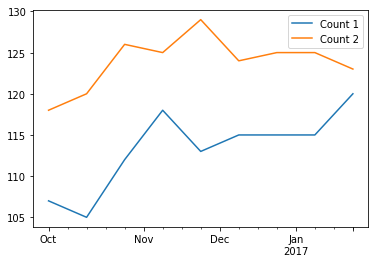

In [119]:
#plot time series
import matplotlib.pyplot as plt
%matplotlib inline #NOT necessary 

df.plot()